<div class="alert alert-success">
 <font size="2"><p align="justify"><font color="black"><h1><center> PREDIKSI PENYAKIT KANKER PAYUDARA  MENGGUNAKAN ARTIFICIAL NEURAL NETWORK  </center></h1></font>

<div class="alert alert-danger">
 <font size="5"><p align="justify">&emsp;<font color="grey">  NAMA  : M Alfin Sukma Wardani
<br>&emsp; NIM   : 09011181722008
<br>&emsp; KELAS : SK5B
<br>&emsp; MK    : KECERDASAN BUATAN

<div class="alert alert-warning">
 <font size="3"><p align="justify">
    <font color="black"><center> <b> Abstract </center><br>
&emsp;&emsp;&emsp;&emsp; Kanker payudara adalah tumor ganas yang dimulai di sel-sel payudara. Tumor ganas adalah sekelompok sel kanker yang dapat tumbuh dan menyerang jaringan di sekitarnya atau menyebar (bermetastasis) ke area yang jauh dari tubuh. Penyakit ini terjadi hampir seluruhnya pada wanita, tetapi pria juga bisa mendapatkannya. Hipotesis dari penelitian ini adalah metode Jaringan Syaraf Tiruan yang diharapkan dapat meningkatkan akurasi dalam prediksi pasien kanker payudara. Hasil pengujian harus dilakukan dengan metode pengukuran dan dibandingkan dengan algoritma Jaringan Syaraf Tiruan C.45. Dataset diambil dari UCI dengan jumlah total 699 dan ditemukan tumor jinak atau sebanyak 458 (65,5%) sedangkan kanker ganas atau 241 (34,5%), dengan 699 data dan 10 atribut yang diproses adalah ketebalan payudara. kanker, ukuran sel, bentuk sel, adhesi Margina, ukuran sel epi tunggal, inti sel, kromatin lunak, nukleolus normal, mitos, dan kelas kanker payudara jinak dan kanker payudara ganas. Dari berbagai percobaan yang dilakukan dengan algoritma Jaringan Syaraf Tiruan hasil terbaik adalah dengan 500 Pelatihan Siklus dan Tingkat Pembelajaran 0,5 untuk memperoleh nilai akurasi 95,57%, 93,0% pemilihan, penarikan 94,62% ​​dan AUC 0,986 dengan waktu 38-an. Jadi berdasarkan pengelompokan dengan membandingkan nilai akurasi dan AUC percobaan menunjukkan bahwa algoritma tersebut memiliki klasifikasi Jaringan Syaraf Tiruan dengan sangat baik, dan bila dibandingkan dengan algoritma C4.5 dengan hasil 0,963 lebih baik daripada algoritma Jaringan Syaraf Tiruan. Untuk dapat meningkatkan tingkat keakuratan penelitian sebelumnya yang hanya 93,00% menjadi 95,57% mendapatkan penelitian atau meningkat 2,57%. Untuk menghitung tingkat akurasi dengan 94,42% dan standar yang dicapai dengan menggunakan eksperimen komputasi yang mengubah nilai Learning Rate, ia menghasilkan 95,57%, meningkat 1,42%.

<div class="alert alert-info">
 <font size="3"><p align="justify">
    <font color="black"><strong>Berikut adalah daftar Modul yang digunakan :</strong></font color="red">
    
- <font color="brown"> Keras Applications adalah salah satu modul dalam pustaka Keras yang menyediakan arsitektur berbagai model Deep Learning ternama. Model-model itu sudah dilatih out of the box. Dengan kata lain, menggunakan Keras Applications sama halnya membuat sistem cerdas.

- Paket sklearn.preprocessing menyediakan beberapa fungsi utilitas umum dan kelas transformator untuk mengubah vektor fitur mentah menjadi representasi yang lebih sesuai untuk downstream estimator. Dalam hali ini diimportkan StandardScaler dan MinMaxScaler.

- NumPy adalah paket dasar untuk komputasi ilmiah dengan Python. NumPy juga dapat digunakan sebagai wadah data generik multidimensi yang efisien. Hal ini memungkinkan NumPy untuk terintegrasi dengan mudah dan cepat dengan berbagai macam database.

- Pandas merupakan toolkit yang powerfull sebagai alat analisis data dan struktur untuk bahasa pemrograman Python. 

- Matplotlib.pyplot berfungsi untuk membuat suatu gambar, membuat sebuah plotting area pada gambar, membuat garis pada plotting area, dan-lain-lain.

In [2]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
import pandas as pd

<div class="alert alert-warning">
    <font size="3"><p align="justify"><strong><font color="black">Load Data Dari Dataset </font>
<br><br>&emsp;&emsp;&emsp;Code di bawah ini digunakan untuk load dataset dengan nama "BreastCancer2.csv" karena nama file pada dataset yaitu BreastCancer2.csv 

In [3]:
dataset = pd.read_csv('BreastCancer2.csv',sep=',')

<div class="alert alert-info">
 <font size="3"><p align="justify"><strong><font color="black">Berikut adalah spesifikasi dataset yang digunakan :</strong>
<ul>
<li style="text-align: left;">
    Input terdiri dari 10 variabel dengan berbagai indikator yang sesuai dengan permasalahan yang akan di bahas.
</li> 
</ul>

<ul>
<li style="text-align: left;">
Output terdiri dari 1 variabel, dengan 2 kondisi, yaitu 1 dan 0.
</li>
</ul>
    
<div>

<div class="alert alert-success"> 
    <font size="3"><p align="justify">head() berfungsi untuk melihat data sebanyak n pada kolom awal (jika tidak diisi, akan tampil secara random).

In [4]:
dataset.head()

,id,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


<div class="alert alert-info"> 
    <font size="3"><p align="justify">describe() berfungsi untuk menunjukkan rangkuman statistik seperti rata-rata, median, dan lain sebagainya pada kolom.

In [5]:
dataset.describe()

,id,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


<div class="alert alert-success"><strong><font color="black">HISTOGRAM</strong>
<font size="3"><p align="justify"> <br>
    <font color="brown"> <li style="text-align: left;">Histogram adalah plot yang memungkinkan dapat menemukan dan menunjukkan distribusi frekuensi (bentuk) yang mendasari serangkaian data.
<br><br>
<li style="text-align: left;">hist() befungsi untuk menemukan dan menunjukan distribusi frekuensi berdasarkan serangkaian data, dan plt.show() berfungsi untuk menampilkannya dalam bentuk grafik.

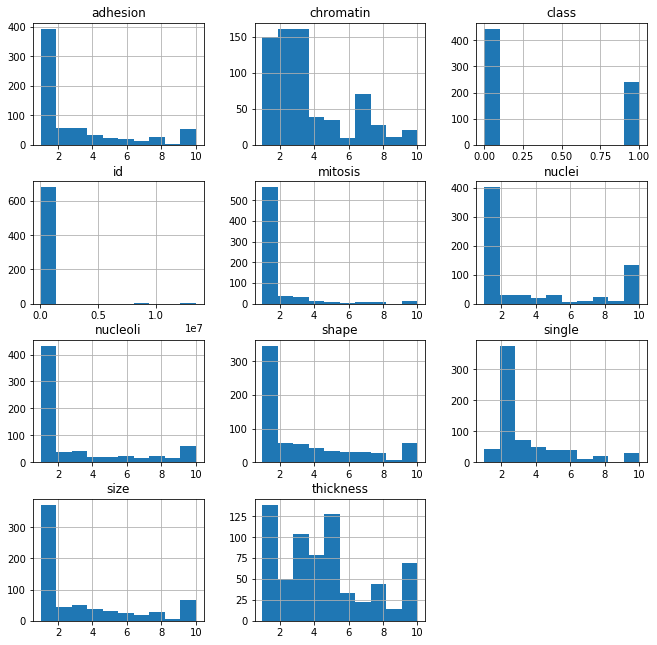

In [7]:
dataset.hist(figsize=(11,11)) 
plt.show() 

<div class="alert alert-info"><strong><font color="black">BOXPLOT</strong><br><br>
<font size="3"><p align="justify"><font color="green">&emsp;&emsp;&emsp;Boxplot berfungsi sebagai penyajian grafis lainnya yang bisa merangkum informasi lebih detail mengenai distribusi nilai-nilai data pengamatan adalah Box and Whisker Plots atau lebih sering disebut dengan BoxPlot. Seperti namanya, Box and Whisker, bentuknya terdiri dari Box (kotak) dan Whisker. Boxplot merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data, ukuran tendensi sentral dan ukuran penyebaran data pengamatan. 

<div class="alert alert-danger">
 <font size="3"><p align="justify">Menampilkan dataset

In [19]:
dataset

,id,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
5,1017122,8,10,10,8,7,10,9,7,1,1
6,1018099,1,1,1,1,2,10,3,1,1,0
7,1018561,2,1,2,1,2,1,3,1,1,0
8,1033078,2,1,1,1,2,1,1,1,5,0
9,1033078,4,2,1,1,2,1,2,1,1,0


In [20]:
dataset = dataset.values

<div class="alert alert-danger">
 <font size="3"><p align="justify">Pemisahan Data Fitur Dengan Label Dan ID


<div class="alert alert-warning">
 <font size="3"><p align="justify">
   <font color="black"> <strong>Mengambil nilai pada input feature dan output label</strong> </font color="red">
<font color="green"><br><br>&emsp;&emsp;&emsp;Untuk feature :,0:10 artinya kolom 0 sampai dengan 10 karena pada dataset terdiri dari 11 kolom. Dan untuk label :,10 artinya kolom ke 10 sebagai output.

In [21]:
features = dataset[:,0:10]
labels = dataset [:, 10]

<div class="alert alert-info">
 <font size="3"><p align="justify">Scalling Data

<div class="alert alert-success">
 <font size="3"><p align="justify">
    <strong><font color="black">Normalisasi atau preprocessing data</strong> 
<br><br><font color="purple">&emsp;&emsp;&emsp;Normalisasi disini merupakan penskalaan nilai atribut dari data sehingga bisa jatuh pada range tertentu. Metode normalisasi yang digunakan yaitu Min Max, Metode Min-Max merupakan metode normalisasi dengan melakukan transformasi linier terhadap data asli.

In [22]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

<div class="alert alert-danger">
 <font size="3"><p align="justify">
    <strong>Proses pembagian atau split data</strong> 

In [23]:
training_data, testing_data, training_label, testing_label = train_test_split(features, labels , test_size=0.2, shuffle=True, stratify=labels)

<div class="alert alert-warning">
 <font size="3"><p align="justify">
    <strong><font color="black"> Model ANN</strong>
<br> <br> <font color="blue">&emsp;&emsp;&emsp;Model ANN yang digunakan dengan hidden layer 1 dan node pada hidden layer 100, input layer 1 dan node input layer 10. Fungsi aktivasi yang digunakan yaitu Relu. Fungsi aktivasi ReLu merupakan fungsi aktivasi yang paling sering digunakan untuk saat ini. ReLu digunakan untuk hidden layer dan mempunyai output 0 jika input kurang dari 0. Jika input lebih besar dari 0, output sama dengan input. 

In [58]:
model = Sequential()
model.add(Dense(units= 100, input_dim = 10, activation=relu))
model.add(Dense(units= 100, activation=relu))
model.add(Dropout(0.5))
model.add(Dense(units= 1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.save('model.h5')

<div class="alert alert-danger">
 <font size="3"><strong><p align="justify"><font color="black">Penjelasan Model Layer</strong>
<ul>
<li style="text-align: left;"><font color="green">
    Dense 100 = Model Neural Network yang saya buat pada layer pertama ini terdiri dari 100 neuron.
</li> 
</ul>

<ul>
<li style="text-align: left;"><font color="green">
Rectified Linear Unit (ReLU) = Merupakan fungsi aktivasi linear yang digunakan pada layer ini.
</li>
</ul>

<ul>
<li style="text-align: left;"><font color="green">
Input dim 10 = Berdasarkan dataset yang digunakan, variabel terdiri dari 11 kategori. 10 kategori input, dan 1 kategori output.
</li>
</ul>
    
<ul>
<li style="text-align: left;"><font color="green">
    Dense 100 = Model Neural Network yang saya buat pada layer pertama ini terdiri dari 100 neuron.
</li> 
</ul>

<ul>
<li style="text-align: left;"><font color="green">
Rectified Linear Unit (ReLU) = Merupakan fungsi aktivasi linear yang digunakan pada layer ini.
</li>
</ul>

<ul>
<li style="text-align: left;"><font color="green">
Dropout 0.5 = Dropout ini berfungsi untuk membuang neuron berlebih jika terjadi kelebihan neuron pada layer ini
</li>
</ul>

<ul>
<li style="text-align: left;"><font color="green">
Dense 1 = Neural Network yang saya buat pada layer terakhir ini terdiri dari 1 neuron, neuron inilah yang akan menghasilkan output berdasarkan dataset yang ada dan memprediksinya.
</li> 
</ul>

<ul>
<li style="text-align: left;"><font color="green">
Sigmoid = Merupakan fungsi aktivasi yang digunakan pada layer ini, fungsi aktivasi sigmoid memberikan output dengan rentan nilai anatara 0 s/d 1
</li>
</ul>
    
<div>

<div class="alert alert-danger">
 <font size="3"><p align="justify">
    <strong>Akurasi Training dan Testing, serta Prediksi Training dan Testing</strong>

In [59]:
acc_training = model.fit(training_data, training_label, validation_data=(testing_data, testing_label), batch_size=32, epochs=100)
acc_testing  = model.evaluate(testing_data, testing_label) 

Train on 546 samples, validate on 137 samples
Epoch 1/100
546/546 [==============================] - 14s 26ms/step - loss: 0.7025 - accuracy: 0.5037 - val_loss: 0.6905 - val_accuracy: 0.5766
Epoch 2/100
546/546 [==============================] - 1s 993us/step - loss: 0.6859 - accuracy: 0.6264 - val_loss: 0.6752 - val_accuracy: 0.8248
Epoch 3/100
546/546 [==============================] - 0s 656us/step - loss: 0.6721 - accuracy: 0.7161 - val_loss: 0.6598 - val_accuracy: 0.8978
Epoch 4/100
546/546 [==============================] - 0s 799us/step - loss: 0.6567 - accuracy: 0.7692 - val_loss: 0.6443 - val_accuracy: 0.9270
Epoch 5/100
546/546 [==============================] - 1s 1ms/step - loss: 0.6440 - accuracy: 0.8553 - val_loss: 0.6286 - val_accuracy: 0.9270
Epoch 6/100
546/546 [==============================] - 0s 750us/step - loss: 0.6297 - accuracy: 0.8571 - val_loss: 0.6124 - val_accuracy: 0.9270
Epoch 7/100
546/546 [==============================] - 1s 1ms/step - loss: 0.6124 - ac

<div class="alert alert-success">
 <font size="3"><b><font color="black">Penjelasan
<br><br><font color="grey"><ul><li>Epoch adalah ketika seluruh dataset sudah melalui proses training pada neural netwok sampai dikembalikan ke awal untuk sekali putaran (backpropagation)
    <br><li> Batch Size 32 adalah jumlah sampel data yang disebarkan ke Neural Network. Jadi dataset akan dibagi menjadi 32 bagian untuk memudahkan index pada saat pelatihan.
    <br><li>Validation SPlit 0.2 adalah ukuran data yang akan digunakan untuk testing dan training, data training sebesar 0.8 atau 80%, dan data testing sebesar 0.2 atau 20%.

In [60]:
print('akurasinya adalah {}'.format(acc_testing[1]))

akurasinya adalah 0.9781022071838379


In [61]:
acc_training.history

{'val_loss': [0.6905332299044532,
  0.6752425645389696,
  0.6598366272710535,
  0.6442549037237237,
  0.6285926238463743,
  0.6124247151569728,
  0.5964282498742542,
  0.58011572117353,
  0.5632617826009318,
  0.5457049094847519,
  0.5278567006118107,
  0.5090357991900757,
  0.4894520174847902,
  0.4692819518764524,
  0.448315817074184,
  0.4272154245498407,
  0.40623727201545323,
  0.3852247393479312,
  0.36478731993341096,
  0.34498868763011736,
  0.3260997070448242,
  0.3070661530007411,
  0.2886010801052525,
  0.27170772828759937,
  0.2552254911321793,
  0.23963142735679654,
  0.2253619308454277,
  0.21186941622817604,
  0.19966959159304626,
  0.18858793334369242,
  0.17844951571556775,
  0.16981149176611518,
  0.16119320375205826,
  0.15349200585462752,
  0.14685763152193848,
  0.14057464636590358,
  0.1349184830693433,
  0.12995895237600716,
  0.12523888377812656,
  0.12120310499937866,
  0.11789489129598993,
  0.1143067698844158,
  0.11126848897577202,
  0.10847733188828412,
  0

<div class="alert alert-warning">
 <font size="3"><p align="justify">
    <strong>Menampilkan Model Akurasi</strong>

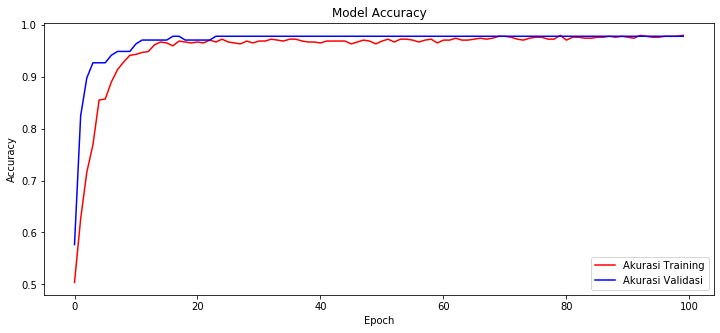

In [62]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(acc_training.history['accuracy'],'red', label='Akurasi Training')
ax0.plot(acc_training.history['val_accuracy'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()
plt.savefig('Grafik Akurasi.png')

<div class="alert alert-danger">
 <font size="3"><p align="justify">
    <strong>Menampilkan Model Loss</strong>

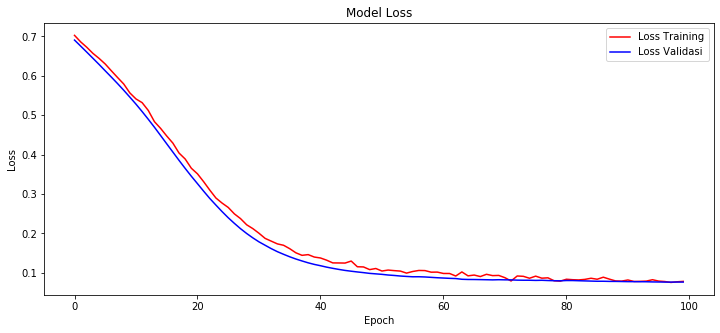

In [63]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(12,5))
ax1.plot(acc_training.history['loss'],'red', label='Loss Training')
ax1.plot(acc_training.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
plt.savefig('Grafik Loss.png')

<div class="alert alert-success">
 <font size="3"><p align="justify">
  Menampilkan model predict training data dan model predict testing data</strong>

In [64]:
training_predicted = model.predict(training_data)
testing_predicted = model.predict(testing_data)

In [65]:
training_predicted

array([[9.93157506e-01],
       [9.11206007e-01],
       [4.76746976e-01],
       [9.90179539e-01],
       [9.16035652e-01],
       [9.91844773e-01],
       [3.64995003e-03],
       [4.42776084e-03],
       [5.21489978e-03],
       [3.99553776e-03],
       [3.93167138e-03],
       [1.18592381e-02],
       [2.94271111e-03],
       [3.11741233e-03],
       [9.90603685e-01],
       [6.17256761e-03],
       [4.91562486e-03],
       [3.96046042e-03],
       [1.32862628e-02],
       [3.68767977e-03],
       [6.40928745e-03],
       [7.94124603e-03],
       [9.89286900e-01],
       [5.03727794e-03],
       [9.98543739e-01],
       [3.73631716e-03],
       [2.46783197e-02],
       [9.99473453e-01],
       [4.44835424e-03],
       [5.64467907e-03],
       [6.75360560e-01],
       [1.98006928e-02],
       [3.20729613e-03],
       [1.19351447e-02],
       [9.95038331e-01],
       [8.55060637e-01],
       [9.58759367e-01],
       [1.67378962e-01],
       [3.23113799e-03],
       [9.98412549e-01],


<div class="alert alert-success">
 <font size="3"><p align="justify">
    <strong><font color="black">Confusion Matrix Training Testing</strong>

<font color="grey">&emsp;&emsp;&emsp;Confusion matrix merupakan salah satu metode yang dapat digunakan untuk mengukur kinerja suatu metode klasifikasi. Pada dasarnya confusion matrix mengandung informasi yang membandingkan hasil klasifikasi yang dilakukan oleh sistem dengan hasil klasifikasi yang seharusnya

In [66]:
from sklearn.metrics import confusion_matrix

training_cm = confusion_matrix(training_label,training_predicted.round())
testing_cm = confusion_matrix(testing_label,testing_predicted.round())


<div class="alert alert-danger">
<font size="3"><p align="justify">Konsep dari confusion matrix adalah sebagai berikut :

In [67]:
training_cm

array([[347,   8],
       [  3, 188]], dtype=int64)

<div class="alert alert-info">
 <font size="3"><p align="justify">
    <strong>Pembuktian perhitungan</strong>

In [68]:
#training
tp = training_cm[0][0]
fn = training_cm[0][1]
fp = training_cm[1][0]
tn = training_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy training {0}".format(accuracy))
print("Specificity training {0}".format(specificity))
print("Sensitivity training {0}".format(sensitivity))
print("Precision training {0}".format(precision))
print("F1 Score training {0}".format(f1_score))

Accuracy training 0.9798534798534798
Specificity training 0.9842931937172775
Sensitivity training 0.9774647887323944
Precision training 0.9914285714285714
F1 Score training 0.9843971631205674


In [69]:
print(testing_cm)

[[87  2]
 [ 1 47]]


In [70]:
tp = testing_cm[0][0]
fn = testing_cm[0][1]
fp = testing_cm[1][0]
tn = testing_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy testing {0}".format(accuracy))
print("Specificity testing {0}".format(specificity))
print("Sensitivity testing {0}".format(sensitivity))
print("Precision testing {0}".format(precision))
print("F1 Score testing {0}".format(f1_score))

Accuracy testing 0.9781021897810219
Specificity testing 0.9791666666666666
Sensitivity testing 0.9775280898876404
Precision testing 0.9886363636363636
F1 Score testing 0.983050847457627
